In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset
test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")

In [3]:
# Shape of dataset
train_data.shape

(891, 12)

In [4]:
# Information about data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Following are the key conclusion from above output:

- There are columns with null values.
- There are 3 different datatypes present in dataset.
- There are both categorical and numerical columns present in dataset.
- The column to be predicted is categorical.
- Some columns are more significant than others.

In [5]:
# Number of null values in each column
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# let's get the overview of data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# let's drop PassengerId, Name, Ticket and Cabin column.
train_data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

# Checking the random columns
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


The SibSp column represents Sibling and Spouse.
Parch column represents Parent and Child. 
These two columns can be merged to form a new column, let's say Family.

In [9]:
# No. of Family member = no. of sibling/spouse + no. of parent/child
train_data["Family"] = train_data["SibSp"] + train_data["Parch"]

# Checking the dataframe
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


# Description of features¶
- Survived:
This column show whether the passenger survived or not. This will act as a label for our model.

- Pclass and Fare:
Pclass shows the socio-economic status (SES) of the passenger travelling. We will be further try to study whether having a good SES helps surviving in these situations.

- Sex:
Males are generally physically more endurable than counterparts. But while rescuing in Titanic ship, the females and children were given priority. We will need more study for this column.

- Age:
Adolscenes population is likely to survive due to physical and mental support of age. The elders and children may find themselves in confused situation. This column also needs study.

- SibSp and Parch:
These columns can be useful due to the fact that having someone close in disastrous situation can relieve the mind.

- Embarked:
The people embarked later in journey are more likely to be active and alert than those who were embarked earlier. On the other hand, there is a chance that earlier embarked people may be more aware about the locations of the boat.'''

# Exploratory Analysis

In [10]:
# Number of survived passengers
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

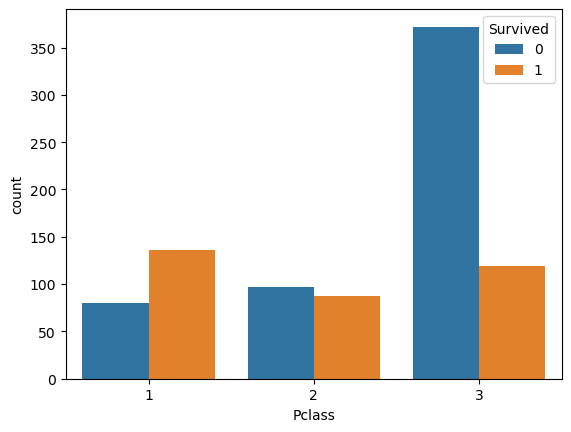

In [11]:
# Visualizing the dependence of SES
sns.countplot(train_data, x="Pclass", hue="Survived", )
plt.show()

It can be observed that 1st class passengers have most survival rate in 
comparison to other two. Mortality rate in 3rd class is higher.

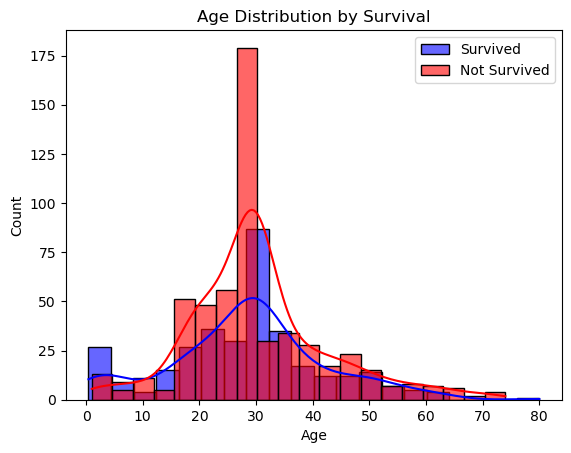

In [13]:
# Visualizing survival relation with age

# First imputing the empty ages with mean
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].mean())
sns.histplot(train_data[train_data["Survived"] == 1]["Age"], label="Survived", kde=True, color="blue", bins=20, alpha=0.6)
sns.histplot(train_data[train_data["Survived"] == 0]["Age"], label="Not Survived", kde=True, color="red", bins=20, alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by Survival")
plt.legend()
plt.show()

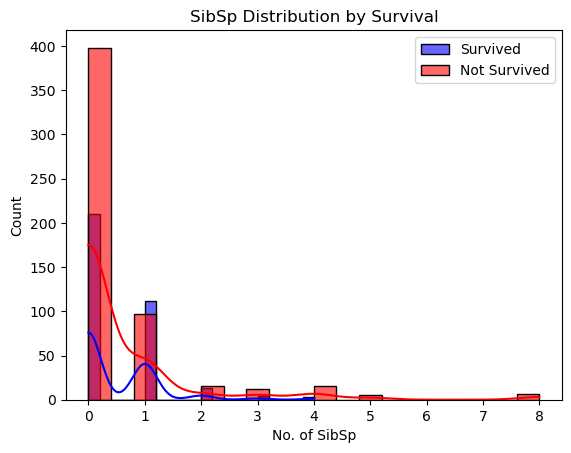

In [14]:
# Visualizing dependency of SibSp
train_data["SibSp"].value_counts()
sns.histplot(train_data[train_data["Survived"] == 1]["SibSp"], label="Survived", kde=True, color="blue", bins=20, alpha=0.6)
sns.histplot(train_data[train_data["Survived"] == 0]["SibSp"], label="Not Survived", kde=True, color="red", bins=20, alpha=0.6)
plt.xlabel("No. of SibSp")
plt.ylabel("Count")
plt.title("SibSp Distribution by Survival")
plt.legend()
plt.show()

In [15]:
# Statistical Analysis
survival_rate = train_data[train_data["Survived"] == 1]["SibSp"].value_counts()/train_data["SibSp"].value_counts()
print(survival_rate)

0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5         NaN
8         NaN
Name: SibSp, dtype: float64


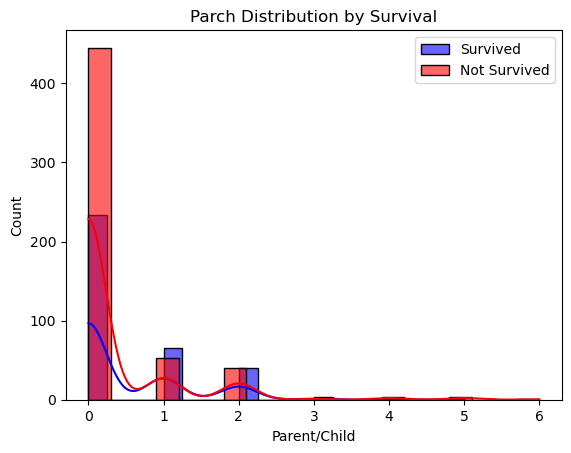

In [16]:
# Visualizing dependency of Parch
train_data["Parch"].value_counts()
sns.histplot(train_data[train_data["Survived"] == 1]["Parch"], label="Survived", kde=True, color="blue", bins=20, alpha=0.6)
sns.histplot(train_data[train_data["Survived"] == 0]["Parch"], label="Not Survived", kde=True, color="red", bins=20, alpha=0.6)
plt.xlabel("Parent/Child")
plt.ylabel("Count")
plt.title("Parch Distribution by Survival")
plt.legend()
plt.show()

In [17]:
# Statistical Analysis
survival_rate = train_data[train_data["Survived"] == 1]["Parch"].value_counts()/train_data["Parch"].value_counts()
casuality_rate = train_data[train_data["Survived"] == 0]["Parch"].value_counts()/train_data["Parch"].value_counts()
print(survival_rate)
print(casuality_rate)

0    0.343658
1    0.550847
2    0.500000
3    0.600000
4         NaN
5    0.200000
6         NaN
Name: Parch, dtype: float64
0    0.656342
1    0.449153
2    0.500000
3    0.400000
4    1.000000
5    0.800000
6    1.000000
Name: Parch, dtype: float64


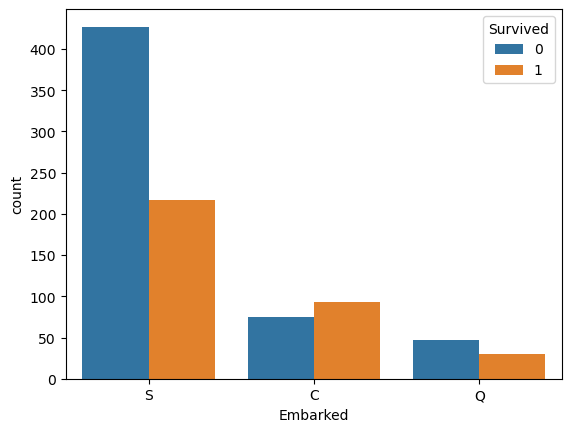

In [18]:
# Analysing for Embarked Column
train_data["Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].mode())
sns.countplot(train_data, x="Embarked", hue="Survived")
plt.show()

In [19]:
# Statistical Analysis
survival_rate = train_data[train_data["Survived"] == 1]["Embarked"].value_counts()/train_data["Embarked"].value_counts()
print(survival_rate)

S    0.336957
C    0.553571
Q    0.389610
Name: Embarked, dtype: float64


In [20]:
# Now for family column
survival_rate = train_data[train_data["Survived"] == 1]["Family"].value_counts()/train_data["Family"].value_counts()
print(survival_rate)

0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7          NaN
10         NaN
Name: Family, dtype: float64


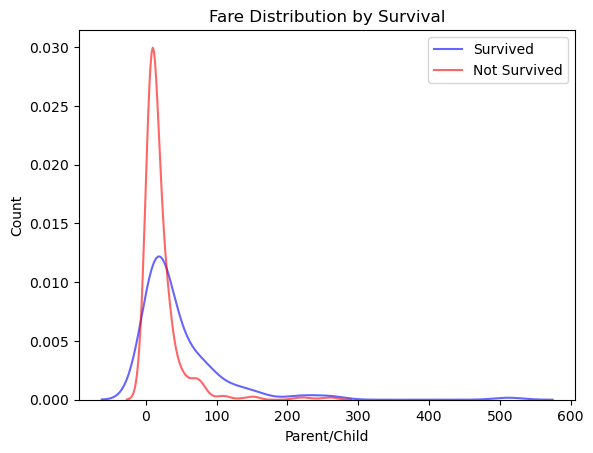

In [21]:
# Analysing Fare
train_data["Fare"].value_counts()
sns.kdeplot(train_data[train_data["Survived"] == 1]["Fare"], label="Survived", color="blue",alpha=0.6)
sns.kdeplot(train_data[train_data["Survived"] == 0]["Fare"], label="Not Survived", color="red",alpha=0.6)
plt.xlabel("Parent/Child")
plt.ylabel("Count")
plt.title("Fare Distribution by Survival")
plt.legend()
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train_data["Sex"] = encoder.fit_transform(train_data["Sex"])
train_data["Embarked"] = encoder.fit_transform(train_data["Embarked"])

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,1,22.0,1,0,7.2500,2,1
1,1,1,0,38.0,1,0,71.2833,0,1
2,1,3,0,26.0,0,0,7.9250,2,0
3,1,1,0,35.0,1,0,53.1000,2,1
4,0,3,1,35.0,0,0,8.0500,2,0


In [23]:
from sklearn.model_selection import train_test_split
X = train_data.drop(columns="Survived", axis=1)
y = train_data["Survived"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [25]:
from sklearn.metrics import accuracy_score
print("Train Data Accuracy:", accuracy_score(y_train, lr.predict(X_train)))
print("Validation Data Accuracy: ", accuracy_score(y_val, lr.predict(X_val)))

Train Data Accuracy: 0.8117977528089888
Validation Data Accuracy:  0.7877094972067039


### Let's try removing SibSp and Parch

In [26]:
X_1 = X.drop(columns=["SibSp", "Parch"], axis=1)
y_1 = y
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=2)

In [27]:
lr_1 = LogisticRegression()
lr_1.fit(X_train_1, y_train_1)

LogisticRegression()

In [28]:
print("Train Data Accuracy:", accuracy_score(y_train_1, lr_1.predict(X_train_1)))
print("Validation Data Accuracy: ", accuracy_score(y_val_1, lr_1.predict(X_val_1)))

Train Data Accuracy: 0.8117977528089888
Validation Data Accuracy:  0.7821229050279329


##### It can be understood that model performs almost same after removing expected redundant columns. Let's try removing Family

In [29]:
X_2 = X.drop(columns=["Family"], axis=1)
y_2 = y
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=5)

In [30]:
lr_2 = LogisticRegression(max_iter=200)
lr_2.fit(X_train_2, y_train_2)

LogisticRegression(max_iter=200)

In [31]:
print("Train Data Accuracy:", accuracy_score(y_train_2, lr_2.predict(X_train_2)))
print("Validation Data Accuracy: ", accuracy_score(y_val_2, lr_2.predict(X_val_2)))

Train Data Accuracy: 0.797752808988764
Validation Data Accuracy:  0.8212290502793296


### Now let's try normalizing Age and Fare column

In [32]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
X_3, y_3 = X, y

X_3["Age"] = minmax_scaler.fit_transform(X_3[["Age"]]) 
X_3["Fare"] = minmax_scaler.fit_transform(X_3[["Fare"]])
X_train_3, X_val_3, y_train_3, y_val_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=5)

lr_3 = LogisticRegression(max_iter=200)
lr_3.fit(X_train_3, y_train_3)

print("Train Data Accuracy:", accuracy_score(y_train_3, lr_3.predict(X_train_3)))
print("Validation Data Accuracy: ", accuracy_score(y_val_3, lr_3.predict(X_val_3)))

Train Data Accuracy: 0.800561797752809
Validation Data Accuracy:  0.8156424581005587


In [33]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_4, y_4 = X, y

X_4 = standard_scaler.fit_transform(X_4) 
X_train_4, X_val_4, y_train_4, y_val_4 = train_test_split(X_4, y_4, test_size=0.2, random_state=2)

lr_4 = LogisticRegression(max_iter=200)
lr_4.fit(X_train_4, y_train_4)

print("Train Data Accuracy:", accuracy_score(y_train_4, lr_4.predict(X_train_4)))
print("Validation Data Accuracy: ", accuracy_score(y_val_4, lr_4.predict(X_val_4)))

Train Data Accuracy: 0.8089887640449438
Validation Data Accuracy:  0.7821229050279329


# Prediction using Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
lr_final = LogisticRegression()
lr_final.fit(X, y)

LogisticRegression()

In [35]:
#Let's Train data prediction
print("Train data prediction: ", accuracy_score(y, lr_final.predict(X)))

Train data prediction:  0.8013468013468014


# Preparing Test Set for Prediction

In [36]:
# Current state of test set
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
# Let's Check null values
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [38]:
# Preprocessing the data
encoder = LabelEncoder()

test_data["Age"] = test_data["Age"].fillna(test_data["Age"].mean())
test_data["Fare"] = test_data["Fare"].fillna(test_data["Fare"].mean())
test_data["Sex"] = encoder.fit_transform(test_data["Sex"])
test_data["Embarked"] = encoder.fit_transform(test_data["Embarked"])

In [39]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2


In [40]:
test_data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [41]:
test_data["Family"] = test_data["SibSp"] + test_data["Parch"]
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,3,1,34.5,0,0,7.8292,1,0
1,3,0,47.0,1,0,7.0000,2,1
2,2,1,62.0,0,0,9.6875,1,0
3,3,1,27.0,0,0,8.6625,2,0
4,3,0,22.0,1,1,12.2875,2,2


# Logistic Regression Prediction

In [42]:
predictions = lr_final.predict(test_data)
passenger_ids = range(892, 892 + len(predictions))

# Create DataFrame
final_df = pd.DataFrame({"PassengerId": passenger_ids, "Survived": predictions})

# Set PassengerId as index
final_df.set_index("PassengerId", inplace=True)

final_df.value_counts()

Survived
0           387
1            31
dtype: int64

# Implementing Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
dte_classifier = DecisionTreeClassifier()

dte_classifier.fit(X_train, y_train)

# Train Data Prediction
print("Train Data Prediction: ", accuracy_score(y_train, dte_classifier.predict(X_train)))
# Validation Data Prediction
print("Validation Data Prediction: ", accuracy_score(y_val, dte_classifier.predict(X_val)))

Train Data Prediction:  0.9859550561797753
Validation Data Prediction:  0.776536312849162


In [44]:
# Seems like model is overfitted
# Let's try transformation
std_scaler = StandardScaler()
X_1, y_1 = X, y

X_1["Age"] = std_scaler.fit_transform(X_1[["Age"]]) 
X_1["Fare"] = std_scaler.fit_transform(X_1[["Fare"]])
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=5)

dte_classifier_1 = DecisionTreeClassifier()
dte_classifier_1.fit(X_train_1, y_train_1)

print("Train Data Accuracy:", accuracy_score(y_train_1, dte_classifier_1.predict(X_train_1)))
print("Validation Data Accuracy: ", accuracy_score(y_val_1, dte_classifier_1.predict(X_val_1)))

Train Data Accuracy: 0.9845505617977528
Validation Data Accuracy:  0.8156424581005587


# Standardization using zscore helped improve the score

## Prediction on Test Data

In [45]:
# Transforming test data
dte_test_data = test_data.copy()
# dte_test_data["Age"] = std_scaler.fit_transform(dte_test_data[["Age"]]) 
# dte_test_data["Fare"] = std_scaler.fit_transform(dte_test_data[["Fare"]])

dte_final = DecisionTreeClassifier()
dte_final.fit(X, y)

dte_predictions = dte_final.predict(dte_test_data)
passenger_ids = range(892, 892 + len(dte_predictions))

# Create DataFrame
dte_submission_df = pd.DataFrame({"PassengerId": passenger_ids, "Survived": predictions})

# Let's Set PassengerId as index
dte_submission_df.set_index("PassengerId", inplace=True)

print("Train Accuracy: ", accuracy_score(y, dte_final.predict(X)))

display(dte_submission_df.value_counts())
dte_submission_df.to_csv("dte_submission.csv")


Train Accuracy:  0.9820426487093153


Survived
0           387
1            31
dtype: int64

# Implementing Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train, y_train)

# Train Data Prediction
print("Train Data Prediction: ", accuracy_score(y_train, rf_classifier.predict(X_train)))
# Validation Data Prediction
print("Validation Data Prediction: ", accuracy_score(y_val, rf_classifier.predict(X_val)))

Train Data Prediction:  0.9859550561797753
Validation Data Prediction:  0.8044692737430168


In [47]:
std_scaler = StandardScaler()
X_1, y_1 = X, y

X_1["Age"] = std_scaler.fit_transform(X_1[["Age"]]) 
X_1["Fare"] = std_scaler.fit_transform(X_1[["Fare"]])
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=5)

rf_classifier_1 = RandomForestClassifier()
rf_classifier_1.fit(X_train_1, y_train_1)

print("Train Data Accuracy:", accuracy_score(y_train_1, rf_classifier_1.predict(X_train_1)))
print("Validation Data Accuracy: ", accuracy_score(y_val_1, rf_classifier_1.predict(X_val_1)))

Train Data Accuracy: 0.9845505617977528
Validation Data Accuracy:  0.8324022346368715


# Ada Boost Classifier

In [48]:
X, y = train_data.drop("Survived", axis=1), train_data["Survived"]

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=2, test_size=0.2)

In [49]:
from sklearn.preprocessing import normalize

normalize
X_2, y_2 = X, y

normalize(X_2[["Age","Fare"]], norm="l1")
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=5)

rf_classifier_1 = RandomForestClassifier()
rf_classifier_1.fit(X_train_1, y_train_1)

print("Train Data Accuracy:", accuracy_score(y_train_1, rf_classifier_1.predict(X_train_1)))
print("Validation Data Accuracy: ", accuracy_score(y_val_1, rf_classifier_1.predict(X_val_1)))

Train Data Accuracy: 0.9845505617977528
Validation Data Accuracy:  0.8379888268156425


In [50]:
# Prediction on Test Data
rf_test_data = test_data.copy()

rf_final = RandomForestClassifier(bootstrap=False)
rf_final.fit(X, y)

rf_predictions = rf_final.predict(rf_test_data)
passenger_ids = range(892, 892 + len(rf_predictions))

# Create DataFrame
rf_submission_df = pd.DataFrame({"PassengerId": passenger_ids, "Survived": predictions})

# let's Set PassengerId as index
rf_submission_df.set_index("PassengerId", inplace=True)

print("Train Accuracy: ", accuracy_score(y, rf_final.predict(X)))

display(rf_submission_df.value_counts())
rf_submission_df.to_csv("rf_submission.csv")

Train Accuracy:  0.9820426487093153


Survived
0           387
1            31
dtype: int64

In [51]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc.fit(X_train, y_train)

print("Train Data Accuracy: ", accuracy_score(abc.predict(X_train), y_train))
print("Test Data Accuracy: ", accuracy_score(abc.predict(X_val), y_val))

abc_test_data = test_data.copy()
abc_predictions = abc.predict(abc_test_data)
abc_submission_df = pd.DataFrame({"PassengerId": passenger_ids, "Survived": predictions})

# let's Set PassengerId as index
abc_submission_df.set_index("PassengerId", inplace=True)
abc_submission_df["Survived"].value_counts()

Train Data Accuracy:  0.8455056179775281
Test Data Accuracy:  0.7653631284916201


0    387
1     31
Name: Survived, dtype: int64

In [52]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int32  
 7   Family    418 non-null    int64  
dtypes: float64(2), int32(2), int64(4)
memory usage: 23.0 KB


# MLP Classifier

In [53]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Define and train the neural network model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Evaluate accuracy
print("Train Data Accuracy: ", accuracy_score(mlp.predict(X_train), y_train))
print("Test Data Accuracy: ", accuracy_score(mlp.predict(X_val), y_val))

# Make predictions on test data
mlp_test_data = test_data.copy()
mlp_predictions = mlp.predict(mlp_test_data)

# Create submission DataFrame
mlp_submission_df = pd.DataFrame({"PassengerId": passenger_ids, "Survived": mlp_predictions})

# Set PassengerId as index
mlp_submission_df.set_index("PassengerId", inplace=True)
print(mlp_submission_df["Survived"].value_counts())
mlp_submission_df.to_csv("mlp_submission.csv")


Train Data Accuracy:  0.8258426966292135
Test Data Accuracy:  0.776536312849162
0    268
1    150
Name: Survived, dtype: int64


## Neural Networks 

In [54]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),  
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  
])
model.add(BatchNormalization())

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
model.fit(X, y, 
          epochs=250, batch_size=128, 
          callbacks=[early_stopping])

# Evaluate the model
train_loss, train_acc = model.evaluate(X, y, verbose=0)
test_loss, test_acc = model.evaluate(X_val, y_val, verbose=0)

print("Train Data Accuracy: ", train_acc)
print("Test Data Accuracy: ", test_acc)

# Make predictions on test data
nn_predictions = (model.predict(test_data) > 0.5).astype(int).flatten()

# Create submission DataFrame
nn_submission_df = pd.DataFrame({"PassengerId": passenger_ids, "Survived": mlp_predictions})
nn_submission_df.set_index("PassengerId", inplace=True)

print(mlp_submission_df["Survived"].value_counts())

nn_submission_df.to_csv("nn_submission.csv")




Epoch 1/250


7/7 [==============================] - 14s 32ms/step - loss: 4.9493 - accuracy: 0.5342
Epoch 2/250
7/7 [==============================] - 0s 35ms/step - loss: 3.6716 - accuracy: 0.5589
Epoch 3/250
7/7 [==============================] - 0s 18ms/step - loss: 2.5701 - accuracy: 0.5410
Epoch 4/250
7/7 [==============================] - 0s 11ms/step - loss: 2.3102 - accuracy: 0.5679
Epoch 5/250
7/7 [==============================] - 0s 13ms/step - loss: 2.1654 - accuracy: 0.5713
Epoch 6/250
7/7 [==============================] - 0s 13ms/step - loss: 2.1785 - accuracy: 0.5589
Epoch 7/250
7/7 [==============================] - 0s 22ms/step - loss: 2.2228 - accuracy: 0.5432
Epoch 8/250
7/7 [==============================] - 0s 17ms/step - loss: 2.2132 - accuracy: 0.5735
Epoch 9/250
7/7 [==============================] - 0s 12ms/step - loss: 1.9624 - accuracy: 0.5802
Epoch 10/250
7/7 [==============================] - 0s 13ms/step - loss: 2.0669 - accuracy: 0.5847
Epoch 11/250
7

7/7 [==============================] - 0s 25ms/step - loss: 1.6759 - accuracy: 0.6162
Epoch 25/250
7/7 [==============================] - 0s 14ms/step - loss: 1.6029 - accuracy: 0.6162
Epoch 26/250
7/7 [==============================] - 0s 21ms/step - loss: 1.6867 - accuracy: 0.6251
Epoch 27/250
7/7 [==============================] - 0s 24ms/step - loss: 1.7264 - accuracy: 0.6128
Epoch 28/250
7/7 [==============================] - 0s 14ms/step - loss: 1.5871 - accuracy: 0.6016
Epoch 29/250
7/7 [==============================] - 0s 14ms/step - loss: 1.5868 - accuracy: 0.6218
Epoch 30/250
7/7 [==============================] - 0s 40ms/step - loss: 1.8150 - accuracy: 0.6162
Epoch 31/250
7/7 [==============================] - 0s 22ms/step - loss: 1.4727 - accuracy: 0.6162
Epoch 32/250
7/7 [==============================] - 0s 17ms/step - loss: 1.6297 - accuracy: 0.6162
Epoch 33/250
7/7 [==============================] - 0s 15ms/step - loss: 1.6110 - accuracy: 0.6061
Epoch 34/250
7/7 [=====

7/7 [==============================] - 0s 9ms/step - loss: 1.4892 - accuracy: 0.6162
Epoch 52/250
7/7 [==============================] - 0s 10ms/step - loss: 1.3928 - accuracy: 0.6162
Epoch 53/250
7/7 [==============================] - 0s 12ms/step - loss: 1.3903 - accuracy: 0.6162
Epoch 54/250
7/7 [==============================] - 0s 12ms/step - loss: 1.3381 - accuracy: 0.6162
Epoch 55/250
7/7 [==============================] - 0s 13ms/step - loss: 1.4051 - accuracy: 0.6162
Epoch 56/250
7/7 [==============================] - 0s 13ms/step - loss: 1.3488 - accuracy: 0.6162
Epoch 57/250
7/7 [==============================] - 0s 13ms/step - loss: 1.2484 - accuracy: 0.6162
Epoch 58/250
7/7 [==============================] - 0s 10ms/step - loss: 1.3175 - accuracy: 0.6162
Epoch 59/250
7/7 [==============================] - 0s 9ms/step - loss: 1.3684 - accuracy: 0.6162
Epoch 60/250
7/7 [==============================] - 0s 10ms/step - loss: 1.3736 - accuracy: 0.6162
Epoch 61/250
7/7 [=======

7/7 [==============================] - 0s 10ms/step - loss: 1.1715 - accuracy: 0.6162
Epoch 79/250
7/7 [==============================] - 0s 15ms/step - loss: 1.1454 - accuracy: 0.6162
Epoch 80/250
7/7 [==============================] - 0s 19ms/step - loss: 1.1874 - accuracy: 0.6162
Epoch 81/250
7/7 [==============================] - 0s 13ms/step - loss: 1.3212 - accuracy: 0.6162
Epoch 82/250
7/7 [==============================] - 0s 13ms/step - loss: 1.3127 - accuracy: 0.6162
Epoch 83/250
7/7 [==============================] - 0s 14ms/step - loss: 1.2796 - accuracy: 0.6162
Epoch 84/250
7/7 [==============================] - 0s 23ms/step - loss: 1.2376 - accuracy: 0.6162
Epoch 85/250
7/7 [==============================] - 0s 14ms/step - loss: 1.2953 - accuracy: 0.6162
Epoch 86/250
7/7 [==============================] - 0s 11ms/step - loss: 1.3113 - accuracy: 0.6162
Epoch 87/250
7/7 [==============================] - 0s 12ms/step - loss: 1.2377 - accuracy: 0.6162
Epoch 88/250
7/7 [=====

7/7 [==============================] - 0s 15ms/step - loss: 1.0816 - accuracy: 0.6162
Epoch 106/250
7/7 [==============================] - 0s 14ms/step - loss: 1.0149 - accuracy: 0.6162
Epoch 107/250
7/7 [==============================] - 0s 13ms/step - loss: 1.2754 - accuracy: 0.6162
Epoch 108/250
7/7 [==============================] - 0s 13ms/step - loss: 0.9948 - accuracy: 0.6162
Epoch 109/250
7/7 [==============================] - 0s 20ms/step - loss: 1.0108 - accuracy: 0.6162
Epoch 110/250
7/7 [==============================] - 0s 19ms/step - loss: 0.9363 - accuracy: 0.6162
Epoch 111/250
7/7 [==============================] - 0s 12ms/step - loss: 0.9809 - accuracy: 0.6162
Epoch 112/250
7/7 [==============================] - 0s 15ms/step - loss: 1.0777 - accuracy: 0.6162
Epoch 113/250
7/7 [==============================] - 0s 11ms/step - loss: 1.0325 - accuracy: 0.6162
Epoch 114/250
7/7 [==============================] - 0s 11ms/step - loss: 1.0305 - accuracy: 0.6162
Epoch 115/250


7/7 [==============================] - 0s 11ms/step - loss: 1.0552 - accuracy: 0.6162
Epoch 133/250
7/7 [==============================] - 0s 10ms/step - loss: 1.1976 - accuracy: 0.6162
Epoch 134/250
7/7 [==============================] - 0s 11ms/step - loss: 1.0306 - accuracy: 0.6162
Epoch 135/250
7/7 [==============================] - 0s 12ms/step - loss: 0.9414 - accuracy: 0.6162
Epoch 136/250
7/7 [==============================] - 0s 14ms/step - loss: 1.0781 - accuracy: 0.6162
Epoch 137/250
7/7 [==============================] - 0s 17ms/step - loss: 0.9212 - accuracy: 0.6162
Epoch 138/250
7/7 [==============================] - 0s 17ms/step - loss: 1.0121 - accuracy: 0.6162
Epoch 139/250
7/7 [==============================] - 0s 23ms/step - loss: 0.9649 - accuracy: 0.6162
Epoch 140/250
7/7 [==============================] - 0s 18ms/step - loss: 1.0614 - accuracy: 0.6162
Epoch 141/250
7/7 [==============================] - 0s 14ms/step - loss: 0.9067 - accuracy: 0.6162
Epoch 142/250


7/7 [==============================] - 0s 10ms/step - loss: 0.8933 - accuracy: 0.6162
Epoch 160/250
7/7 [==============================] - 0s 10ms/step - loss: 0.9465 - accuracy: 0.6162
Epoch 161/250
7/7 [==============================] - 0s 13ms/step - loss: 0.8754 - accuracy: 0.6162
Epoch 162/250
7/7 [==============================] - 0s 11ms/step - loss: 1.0216 - accuracy: 0.6162
Epoch 163/250
7/7 [==============================] - 0s 11ms/step - loss: 0.9275 - accuracy: 0.6162
Epoch 164/250
7/7 [==============================] - 0s 13ms/step - loss: 0.9638 - accuracy: 0.6162
Epoch 165/250
7/7 [==============================] - 0s 19ms/step - loss: 0.9438 - accuracy: 0.6162
Epoch 166/250
7/7 [==============================] - 0s 12ms/step - loss: 0.9504 - accuracy: 0.6162
Epoch 167/250
7/7 [==============================] - 0s 12ms/step - loss: 0.8773 - accuracy: 0.6162
Epoch 168/250
7/7 [==============================] - 0s 10ms/step - loss: 0.8741 - accuracy: 0.6162
Epoch 169/250


7/7 [==============================] - 0s 16ms/step - loss: 0.9239 - accuracy: 0.6162
Epoch 187/250
7/7 [==============================] - 0s 14ms/step - loss: 0.8196 - accuracy: 0.6162
Epoch 188/250
7/7 [==============================] - 0s 20ms/step - loss: 0.9245 - accuracy: 0.6162
Epoch 189/250
7/7 [==============================] - 0s 14ms/step - loss: 0.8672 - accuracy: 0.6162
Epoch 190/250
7/7 [==============================] - 0s 14ms/step - loss: 0.9454 - accuracy: 0.6162
Epoch 191/250
7/7 [==============================] - 0s 11ms/step - loss: 0.8184 - accuracy: 0.6162
Epoch 192/250
7/7 [==============================] - 0s 12ms/step - loss: 0.8495 - accuracy: 0.6162
Epoch 193/250
7/7 [==============================] - 0s 11ms/step - loss: 0.7945 - accuracy: 0.6162
Epoch 194/250
7/7 [==============================] - 0s 11ms/step - loss: 0.9535 - accuracy: 0.6162
Epoch 195/250
7/7 [==============================] - 0s 13ms/step - loss: 0.8907 - accuracy: 0.6162
Epoch 196/250


7/7 [==============================] - 0s 11ms/step - loss: 0.9319 - accuracy: 0.6162
Epoch 214/250
7/7 [==============================] - 0s 11ms/step - loss: 0.8261 - accuracy: 0.6162
Epoch 215/250
7/7 [==============================] - 0s 12ms/step - loss: 0.8298 - accuracy: 0.6162
Epoch 216/250
7/7 [==============================] - 0s 11ms/step - loss: 0.9081 - accuracy: 0.6162
Epoch 217/250
7/7 [==============================] - 0s 11ms/step - loss: 0.8514 - accuracy: 0.6162
Epoch 218/250
7/7 [==============================] - 0s 13ms/step - loss: 0.9154 - accuracy: 0.6162
Epoch 219/250
7/7 [==============================] - 0s 11ms/step - loss: 1.0129 - accuracy: 0.6162
Epoch 220/250
7/7 [==============================] - 0s 11ms/step - loss: 0.9358 - accuracy: 0.6162
Epoch 221/250
7/7 [==============================] - 0s 15ms/step - loss: 0.8290 - accuracy: 0.6162
Epoch 222/250
7/7 [==============================] - 0s 11ms/step - loss: 0.8039 - accuracy: 0.6162
Epoch 223/250


7/7 [==============================] - 0s 28ms/step - loss: 0.8394 - accuracy: 0.6162
Epoch 241/250
7/7 [==============================] - 0s 16ms/step - loss: 0.8022 - accuracy: 0.6162
Epoch 242/250
7/7 [==============================] - 0s 20ms/step - loss: 0.7788 - accuracy: 0.6162
Epoch 243/250
7/7 [==============================] - 0s 14ms/step - loss: 0.8480 - accuracy: 0.6162
Epoch 244/250
7/7 [==============================] - 0s 14ms/step - loss: 0.8687 - accuracy: 0.6162
Epoch 245/250
7/7 [==============================] - 0s 11ms/step - loss: 0.9094 - accuracy: 0.6162
Epoch 246/250
7/7 [==============================] - 0s 17ms/step - loss: 0.8617 - accuracy: 0.6162
Epoch 247/250
7/7 [==============================] - 0s 16ms/step - loss: 0.8510 - accuracy: 0.6162
Epoch 248/250
7/7 [==============================] - 0s 25ms/step - loss: 0.9708 - accuracy: 0.6162
Epoch 249/250
7/7 [==============================] - 0s 14ms/step - loss: 0.8819 - accuracy: 0.6162
Epoch 250/250


## Performances till now
We have used certain machine learning models and a few neural network techniques. Let's try certain different approaches to improve the accuracy on data.

## K-Nearest Neighbour Classifier

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()

knn_classifier.fit(X, y)

# Train prediction
print("Train data prediction: ", accuracy_score(y, knn_classifier.predict(X)))

knn_test_data = test_data.copy()
knn_predictions = knn_classifier.predict(knn_test_data)
knn_submission_df = pd.DataFrame({"PassengerId": passenger_ids, "Survived": predictions})

#let's  Set PassengerId as index
knn_submission_df.set_index("PassengerId", inplace=True)
display(knn_submission_df["Survived"].value_counts())

knn_submission_df.to_csv("knn_classifier.csv")

Train data prediction:  0.8092031425364759


0    387
1     31
Name: Survived, dtype: int64

Till now ML models are performing worse than DL models so from now on we will be focusing on Neural Networks and their optimization

## Changed Approach
We tried tweaking neural nets but it seems like we have reached the limit of our improvement on models. So now let's try to use data efficiently.

In [56]:
train_data_1 = pd.read_csv("train.csv")

In [57]:
train_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [58]:
# let's Drop the PassengerId, Name, Ticket and Cabin column
train_data_1.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

# Checking the columns
train_data_1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [59]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train_data_1["Sex"] = encoder.fit_transform(train_data_1["Sex"])
train_data_1["Embarked"] = encoder.fit_transform(train_data_1["Embarked"])

train_data_1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [60]:
train_data_1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [61]:
# Dropping the null columns
train_data_1.dropna(inplace=True)
train_data_1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [62]:
X_changed = train_data_1.drop("Survived", axis=1)
y_changed = train_data_1["Survived"]

Xc_train, Xc_val, yc_train, yc_val = train_test_split(X_changed,
                                                      y_changed, 
                                                      test_size = 0.2, 
                                                      random_state=2)

## Testing Logistic Regression

In [63]:
lr_changed = LogisticRegression(max_iter=250)
lr_changed.fit(Xc_train, yc_train)

#Evaluation
print("Train Data Accuracy: ", accuracy_score(lr_changed.predict(Xc_train), 
                                              yc_train))
print("Validation Data Accuracy: ", accuracy_score(lr_changed.predict(Xc_val), 
                                                   yc_val))

Train Data Accuracy:  0.8021015761821366
Validation Data Accuracy:  0.8391608391608392


## Prediction On Test Data

In [64]:
test_datac = test_data.drop("Family", axis=1)

lr_changed.fit(X_changed, y_changed)
lrc_predictions = lr_changed.predict(test_datac)

lrc_submission_df = pd.DataFrame({"PassengerId": passenger_ids, "Survived": predictions})

# let's Set PassengerId as index
lrc_submission_df.set_index("PassengerId", inplace=True)
display(lrc_submission_df["Survived"].value_counts())

0    387
1     31
Name: Survived, dtype: int64

Till now no improvements are seen

## Shifting to Neural Networks

In [65]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score
import pandas as pd

# Define the neural network model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_changed.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_changed, y_changed, epochs=150, batch_size=64, verbose=1, validation_data=(Xc_val, yc_val))

# Evaluate the model
test_predictionsc = (model.predict(test_datac) > 0.5).astype(int)


# Convert predictions to DataFrame
nnc_submission_df = pd.DataFrame({"PassengerId": passenger_ids, "Survived": predictions})

# Set PassengerId as index
nnc_submission_df.set_index("PassengerId", inplace=True)
display(nnc_submission_df["Survived"].value_counts())



Epoch 1/150
12/12 [==============================] - 3s 44ms/step - loss: 1.2690 - accuracy: 0.6092 - val_loss: 0.6398 - val_accuracy: 0.6014
Epoch 2/150
12/12 [==============================] - 0s 13ms/step - loss: 0.8813 - accuracy: 0.5924 - val_loss: 0.6819 - val_accuracy: 0.5315
Epoch 3/150
12/12 [==============================] - 0s 7ms/step - loss: 0.8082 - accuracy: 0.5868 - val_loss: 0.6691 - val_accuracy: 0.5245
Epoch 4/150
12/12 [==============================] - 0s 11ms/step - loss: 0.7788 - accuracy: 0.6008 - val_loss: 0.6417 - val_accuracy: 0.5594
Epoch 5/150
12/12 [==============================] - 0s 12ms/step - loss: 0.8125 - accuracy: 0.5518 - val_loss: 0.6468 - val_accuracy: 0.5524
Epoch 6/150
12/12 [==============================] - 0s 11ms/step - loss: 0.7319 - accuracy: 0.5854 - val_loss: 0.6638 - val_accuracy: 0.5245
Epoch 7/150
12/12 [==============================] - 0s 8ms/step - loss: 0.7041 - accuracy: 0.5966 - val_loss: 0.6592 - val_accuracy: 0.5035
Epoch 8

12/12 [==============================] - 0s 9ms/step - loss: 0.6269 - accuracy: 0.6499 - val_loss: 0.5807 - val_accuracy: 0.7273
Epoch 58/150
12/12 [==============================] - 0s 8ms/step - loss: 0.6131 - accuracy: 0.6737 - val_loss: 0.5804 - val_accuracy: 0.7273
Epoch 59/150
12/12 [==============================] - 0s 8ms/step - loss: 0.6066 - accuracy: 0.6611 - val_loss: 0.5804 - val_accuracy: 0.7273
Epoch 60/150
12/12 [==============================] - 0s 7ms/step - loss: 0.6336 - accuracy: 0.6499 - val_loss: 0.5809 - val_accuracy: 0.7273
Epoch 61/150
12/12 [==============================] - 0s 9ms/step - loss: 0.6084 - accuracy: 0.6653 - val_loss: 0.5788 - val_accuracy: 0.7273
Epoch 62/150
12/12 [==============================] - 0s 6ms/step - loss: 0.6075 - accuracy: 0.6667 - val_loss: 0.5779 - val_accuracy: 0.7273
Epoch 63/150
12/12 [==============================] - 0s 8ms/step - loss: 0.6270 - accuracy: 0.6639 - val_loss: 0.5761 - val_accuracy: 0.7273
Epoch 64/150
12/12 

12/12 [==============================] - 0s 7ms/step - loss: 0.5935 - accuracy: 0.6863 - val_loss: 0.5619 - val_accuracy: 0.7133
Epoch 115/150
12/12 [==============================] - 0s 7ms/step - loss: 0.5851 - accuracy: 0.6919 - val_loss: 0.5638 - val_accuracy: 0.7133
Epoch 116/150
12/12 [==============================] - 0s 7ms/step - loss: 0.5890 - accuracy: 0.6723 - val_loss: 0.5599 - val_accuracy: 0.7133
Epoch 117/150
12/12 [==============================] - 0s 9ms/step - loss: 0.5975 - accuracy: 0.6723 - val_loss: 0.5577 - val_accuracy: 0.7063
Epoch 118/150
12/12 [==============================] - 0s 9ms/step - loss: 0.6079 - accuracy: 0.6807 - val_loss: 0.5574 - val_accuracy: 0.7133
Epoch 119/150
12/12 [==============================] - 0s 8ms/step - loss: 0.5980 - accuracy: 0.6681 - val_loss: 0.5568 - val_accuracy: 0.7133
Epoch 120/150
12/12 [==============================] - 0s 9ms/step - loss: 0.6030 - accuracy: 0.6639 - val_loss: 0.5552 - val_accuracy: 0.7133
Epoch 121/150

0    387
1     31
Name: Survived, dtype: int64

# Summary:
Following points can be drawn from the procedures done above:

- Understood which columns are relevant to us and why
- Visualized the importance of features
- Machine Learning models didn't perform as per our expectations
- Deep Learning models performed pretty decently